<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/TP2_Aprendizaje_de_Maquinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1:

Importamos datos para ser analizados:

In [25]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

casos_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv")
camas_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv")
casos_df['nuevos']=0
casos_df['nuevos_validos']='b'
#casos_df['fecha']=casos_df.index

for x in range(1,88,1):
  casos_df['nuevos'][x]=casos_df['activos'][x]-casos_df['activos'][x-1]
  if casos_df['nuevos'][x] <= 0 :
    casos_df['nuevos_validos'][x]='r'
  else:
    casos_df['nuevos_validos'][x]='b'
casos_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,nuevos,nuevos_validos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0,0,b
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0,2,b
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0,9,b
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0,13,b
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0,17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0,52,b
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0,52,b
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0,93,b
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0,10,b


In [26]:
camas_df

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


Claramente en los proximos graficos podemos visualizar como **no** podemos tratar el dataset de camas como si fuera continuo por una cuestion de falta de datos

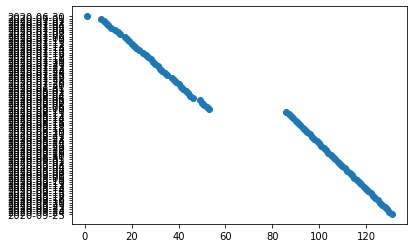

In [27]:
plt.scatter(camas_df['informeNumero'],camas_df['fecha'])

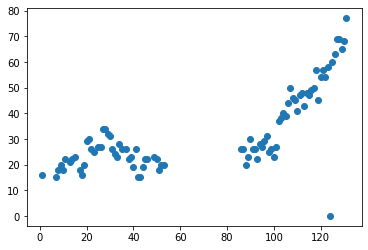

In [28]:
plt.scatter(camas_df['informeNumero'],camas_df['porcentaje_ocupacion_camas_covid'])

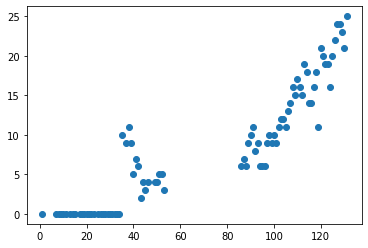

In [29]:
plt.scatter(camas_df['informeNumero'],camas_df['respiradores_covid_ocupados'])

En cambio con el dataset de los casos tranquilamente podriamos tratarlo como si fuera continuo

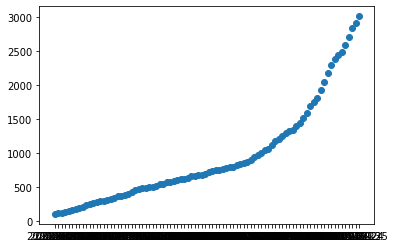

In [30]:
plt.scatter(casos_df['fecha'],casos_df['confirmados'])

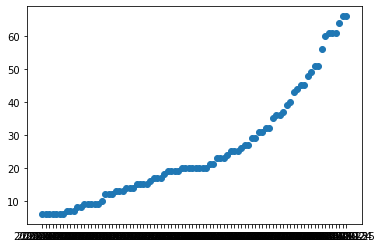

In [31]:
plt.scatter(casos_df['fecha'],casos_df['decesos'])

## Ejercicio 2:

Cargamos datasets de naranjas y mandarinas con distribuciones normales

In [20]:
np.random.seed(1)
#Promedio tamaño de naranjas
nmean=18
nstd=2
#Promedio tamaño de mandarinas
mmean=15
mstd=3
naranjas = pd.Series(np.random.normal(loc=nmean,scale=nstd,size=50))
tag1 = 'Naranja'
df1 = pd.DataFrame({'Tag':tag1,'Values':naranjas})
mandas = pd.Series(np.random.normal(loc=mmean,scale=mstd,size=50))
tag2 = 'Mandarina'
df2 = pd.DataFrame({'Tag':tag2,'Values':mandas})
df = pd.concat([df1,df2],ignore_index=True)
df

,Tag,Values
0,Naranja,21.248691
1,Naranja,16.776487
2,Naranja,16.943656
3,Naranja,15.854063
4,Naranja,19.730815
...,...,...
95,Mandarina,15.232020
96,Mandarina,13.968439
97,Mandarina,15.130791
98,Mandarina,13.139997


Seteamos limites de tamaños de naranjas para predecir:

In [21]:
dist = nstd
lbound = nmean-dist

Configuramos el filtro para naranjas, vamos a analizar 3 posibles casos al rededor del optimo:

In [22]:
def predictions(low_bound):
  a = pd.Series([0 if x < low_bound else 1 for x in df['Values']])
  return a
  
df["naranja_pred_1"] = predictions(lbound)
df["naranja_pred_2"] = predictions(lbound+1)
df["naranja_pred_3"] = predictions(lbound-1)

Trazamos las 3 curvas ROC:

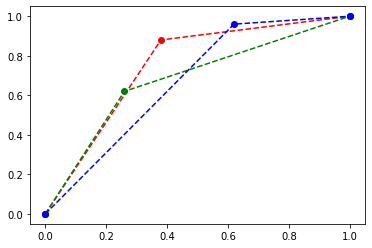

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

predictions_1 =  df['naranja_pred_1'].values
predictions_2 =  df['naranja_pred_2'].values
predictions_3 =  df['naranja_pred_3'].values
label = [1 if x == 'Naranja' else 0 for x in df['Tag']]
fpr1, tpr1, thresholds1 = roc_curve(label, predictions_1)
fpr2, tpr2, thresholds2 = roc_curve(label, predictions_2)
fpr3, tpr3, thresholds3 = roc_curve(label, predictions_3)
plt.plot(fpr1, tpr1, "ro--",fpr2, tpr2, "go--",fpr3, tpr3, "bo--")
plt.show()

Mostramos el F-measure de nuestras predicciones:

In [24]:
from sklearn import metrics
print("F-measure SVM =",metrics.f1_score(label, predictions_1))
print("F-measure SVM =",metrics.f1_score(label, predictions_2))
print("F-measure SVM =",metrics.f1_score(label, predictions_3))

F-measure SVM = 0.7787610619469026
F-measure SVM = 0.6595744680851063
F-measure SVM = 0.7441860465116279
